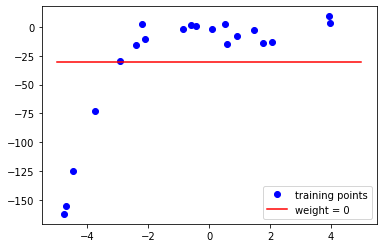

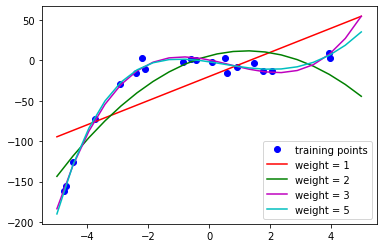

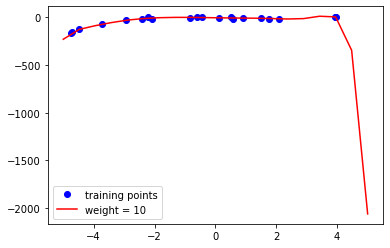

In [8]:
#CMP3751M Machine Learning Assignment 1
#Gabriella Di Gregorio 15624188
#Task 1.2

import pandas as pd
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

#Reads in the data using pandas.read_csv because pandas.DataFrame.from_csv is outdated and discouraged.
Dataset = pd.read_csv('CMP3751M_ML_Assignment 1_Task1 - dataset - pol_regression.csv')

#Assings the x's in the data to the variable x, and the y's in the data to variable y
x = Dataset['x'].values
y = Dataset['y'].values

#function that does the feature expansion up to a certain degree for a given data set x 
def getPolynomialDataMatrix(x, degree):
    #creates an array of 1s in the shape of x
    X = np.ones(x.shape)
    #stacks all the data into a 3D array (matrix)
    for i in range(1,degree + 1):
        X = np.column_stack((X, x ** i))
    return X

#function that computes the optimal values given the input data x, output data y and the desired degree of the polynomial.
#renamed from eval_pol_regression(parameters, x, y, degree)
def getWeightsForPolynomialFit(x,y,degree):
    X = getPolynomialDataMatrix(x, degree)

    #Transposes the matrix then multiplies it by the original
    XX = X.transpose().dot(X)
    #numyp.linalg.solve solves linear matrix equations
    w = np.linalg.solve(XX, X.transpose().dot(y))

    return w

#numpy.linspace returns evenly spaced numbers over a specified interval (Docs.scipy.org, 2019), between -5 and 5 in this case, within the length of x
x_plot = np.linspace(-5,5,len(x))

#plots the first graph using a weight of 0
plt.figure(1)
#plots the training points as blue dots (o's)
plt.plot(x,y,'bo')
#using the getWeightsForPolynomialFit function for 0 would give an empty array error
#since it remains the same, the mean of y is an alternative way to represent it
w0 = np.mean(y)
#gets the matrix between the specified interval of the degree of 0
X0 = getPolynomialDataMatrix(x_plot,0)
#multiplies the matrix by the mean of y (weight 0)
y0 = X0.dot(w0)
#plots the specified range for the x axis, the matrix multiplied by the weight for the y axis, and the colour to display the lines
plt.plot(x_plot,y0,'r')
#adds a key to show what the points and line(s) mean on the graph, and where to put it
plt.legend(('training points', 'weight = 0'), loc = 'lower right')

#the second graph shows weights 1,2,3,and 5
plt.figure(2)
plt.plot(x,y,'bo')
#for all other weights, the function is used to calculate it by passing x, y and desired degree (1 in this case)
w1 = getWeightsForPolynomialFit(x,y,1)
#the rest is the same as for 0
X1 = getPolynomialDataMatrix(x_plot,1)
y1 = X1.dot(w1)
plt.plot(x_plot,y1,'r')

w2 = getWeightsForPolynomialFit(x,y,2)
X2 = getPolynomialDataMatrix(x_plot,2)
y2 = X2.dot(w2)
plt.plot(x_plot,y2,'g')

w3 = getWeightsForPolynomialFit(x,y,3)
X3 = getPolynomialDataMatrix(x_plot,3)
y3 = X3.dot(w3)
plt.plot(x_plot,y3,'m')

w5 = getWeightsForPolynomialFit(x,y,5)
X5 = getPolynomialDataMatrix(x_plot,5)
y5 = X5.dot(w5)
plt.plot(x_plot,y5,'c')
plt.legend(('training points', 'weight = 1', 'weight = 2', 'weight = 3', 'weight = 5'), loc = 'lower right')

#the weight of 10 could not be displayed on the same graph as the rest because it makes it too unclear
#the process for calculating/displaying is the same
plt.figure(3)
plt.plot(x,y,'bo')
w10 = getWeightsForPolynomialFit(x,y,10)
X10 = getPolynomialDataMatrix(x_plot,10)
y10 = X10.dot(w10)
plt.plot(x_plot,y10,'r')
plt.legend(('training points', 'weight = 10'), loc = 'lower left')

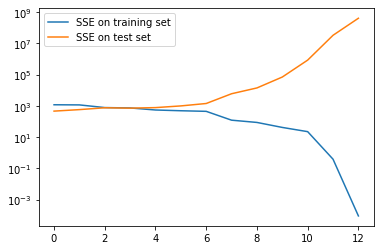

In [7]:
#CMP3751M Machine Learning Assignment 1
#Gabriella Di Gregorio 15624188
#Task 1.3

#function to split the data into a training set and a testing set
def train_test_split(X, y, train_split):
    #the values are first randomly shuffled, so they change each time and the test is fair
    np.random.shuffle(X)
    np.random.shuffle(y)
    #initialises empty arrays to store the x and y train and test sets
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    #goes through all of the values, and if they are after the length multiplied by the split, put them in the test data, if they are before it, put it in the train data
    for position in range(len(X)):
        if position >= len(X)*train_split:
            X_test.append(X[position])
            y_test.append(y[position])
        else:
            X_train.append(X[position])
            y_train.append(y[position])
    return X_train, y_train, X_test, y_test

#makes the data split into 70% training, and 30% testing
x_train, y_train, x_test, y_test = train_test_split(x, y, 0.7)

#numpy.squeeze remove single-dimensional entries from the shape of an array and numpy.as array converts the input to an array
x_train = np.squeeze(np.asarray(x_train))
y_train = np.squeeze(np.asarray(y_train))
x_test = np.squeeze(np.asarray(x_test))
y_test = np.squeeze(np.asarray(x_test))


#The following computes the squarred error on the training and test set for each of these polynomials and plots them as a function of the degree of the polynomial. 
#Creates arrays of 0s with size 13 (14-1 because 14 is 70% of the data) by 1
SSEtrain = np.zeros((13,1))
SSEtest = np.zeros((13,1))

#for all values within the maximum length of 14 (up to 70%), get the matrix of the train and test set and the weights
for i in range(1,14):
    
    Xtrain = getPolynomialDataMatrix(x_train, i) 
    Xtest = getPolynomialDataMatrix(x_test, i)
    
    w = getWeightsForPolynomialFit(x_train, y_train, i)  
    
    #calculates the sum of squared errors for the train and test set by taking the mean of each training and test matrices subtracted from them multiplied by the weight, squared.
    SSEtrain[i - 1] = np.mean((Xtrain.dot(w) - y_train)**2)
    SSEtest[i - 1] = np.mean((Xtest.dot(w) - y_test)**2)
    
#Plots the graph
plt.figure();
#Due to the huge differences in the error, uses a log-scale plot for the y-axis.
plt.semilogy(range(len(SSEtrain)), SSEtrain)
plt.semilogy(range(len(SSEtest)), SSEtest)
plt.legend(('SSE on training set', 'SSE on test set'))
plt.show()
